In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from myula import *
from psgla import *
import distributions as pds
import potentials as pot

ModuleNotFoundError: No module named 'ot'

**Generate data for the likelihood function**

In [2]:
mu_true = 0.8
sigma2_true = 0.5
n_data = 10
nu = 4
rng = default_rng(34523)
D = rng.normal(loc=mu_true,scale=np.sqrt(sigma2_true),size=(n_data,))

**Define the posterior distribution**\
The prior is assumed to be a Gamma distribution with shape parameter $\alpha = \frac{\nu}{2}$, the likelihood is mean estimation for the data points $D_i$.\
Require $\nu > 2$ since we want a log-concave distribution.

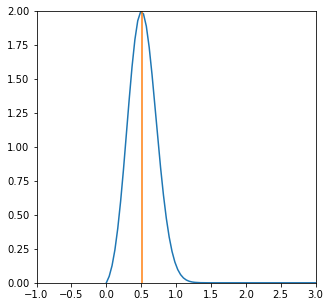

In [3]:
posterior = pds.Gamma_Gauss1D_Posterior_Salim21(data=D, scale=np.sqrt(sigma2_true), nu=nu)
# metaparameter of the distribution: norm of K in ||.||_2
L = np.linalg.norm(posterior.F.K)**2
t = np.reshape(np.linspace(1e-4, 5*nu+np.mean(D),500),(1,-1))
dens_vals = posterior.pdf(t)

plt.figure(figsize=(5,5))
unscaled_dens_plot = plt.plot(np.reshape(t,(-1,)),np.reshape(dens_vals,(-1,)))
xlims = plt.xlim(-1, 3.0)
ylims = plt.ylim(0,2)
mu_map = sigma2_true/(2*n_data)*(n_data/sigma2_true*np.mean(D)-1/2 + np.sqrt((1/2-n_data/sigma2_true*np.mean(D))**2 - 4*n_data/sigma2_true*(1-nu/2)))
plt.plot([mu_map, mu_map],[0,2])
plt.show()

**Sample using PSGLA**

In [9]:
tau = 0.01
max_iter = int(np.max((500,np.round(10/tau))))
n_samples = 50000
x0 = np.mean(D)*np.ones((1,n_samples))
psgla = PSGLA(max_iter, tau, x0, pd = posterior)

x_psgla = psgla.simulate()

**Sample using MYULA**

In [12]:
gamma = 1

sampler_myula = MYULA(max_iter, tau, gamma, x0, pd = posterior)
x_myula = sampler_myula.simulate()

**Compare samples**

In [1]:
x_psgla = np.reshape(x_psgla, (-1,))
x_myula = np.reshape(x_myula, (-1,))

fig, ax = plt.subplots(1, 2, figsize=(10,4))
hist_psgla = ax[0].hist(x_psgla, 300, density=True)
hist_myula = ax[1].hist(x_myula, 300, density=True)

# plot corresponding densities
my_posterior = pds.MY_Gamma_Gauss1D_Posterior_Salim21(data=D, nu=4, scale=np.sqrt(sigma2_true), gamma=gamma)
t1 = np.reshape(np.linspace(1e-10, 4, 500),(1,-1))
t2 = np.reshape(np.linspace(-2, 4, 500),(1,-1))
dens_vals = posterior.pdf(t1)
my_dens_vals = my_posterior.pdf(t2)

pdf_plot_psgla = ax[0].plot(np.reshape(t1,(-1,)),np.reshape(dens_vals,(-1,)), color='r')
xlims = ax[0].set_xlim(-1, 3.0)
ylims = ax[0].set_ylim(0,2)
ax[0].set_title('PLA, step = 0.01')

pdf_plot_myula = ax[1].plot(np.reshape(t1,(-1,)),np.reshape(dens_vals,(-1,)), color='r')
my_pdf_plot_myula = ax[1].plot(np.reshape(t2,(-1,)),np.reshape(my_dens_vals,(-1,1)), color='k')
xlims = ax[1].set_xlim(-1, 3.0)
ylims = ax[1].set_ylim(0,2)
ax[1].set_title('MYULA, step = 0.01, smoothing parameter = 1');

NameError: name 'np' is not defined